Path to directory to save to

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/umaps'

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [2]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster'
file_target= '*contrast*.nii*'

In [3]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=None, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/*contrast*.nii*


Importing niftis: 100%|██████████| 193/193 [00:04<00:00, 39.59it/s]


,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_80.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_1.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_92.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_188.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_184.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_130.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_153.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_61.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_10.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_122.nii.gz,...,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_172.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_40.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_23.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_111.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_89.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_97.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_8.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_4.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_85.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/contrast_0_tval_output_181.nii.gz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Select Mask

In [4]:
mask = '/Users/cu135/hires_backdrops/mni/MNI152_T1_2mm_brain_mask.nii'

Run Umap

[BrainUmap] Cluster report saved to: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/umapsV2/cluster_results.csv


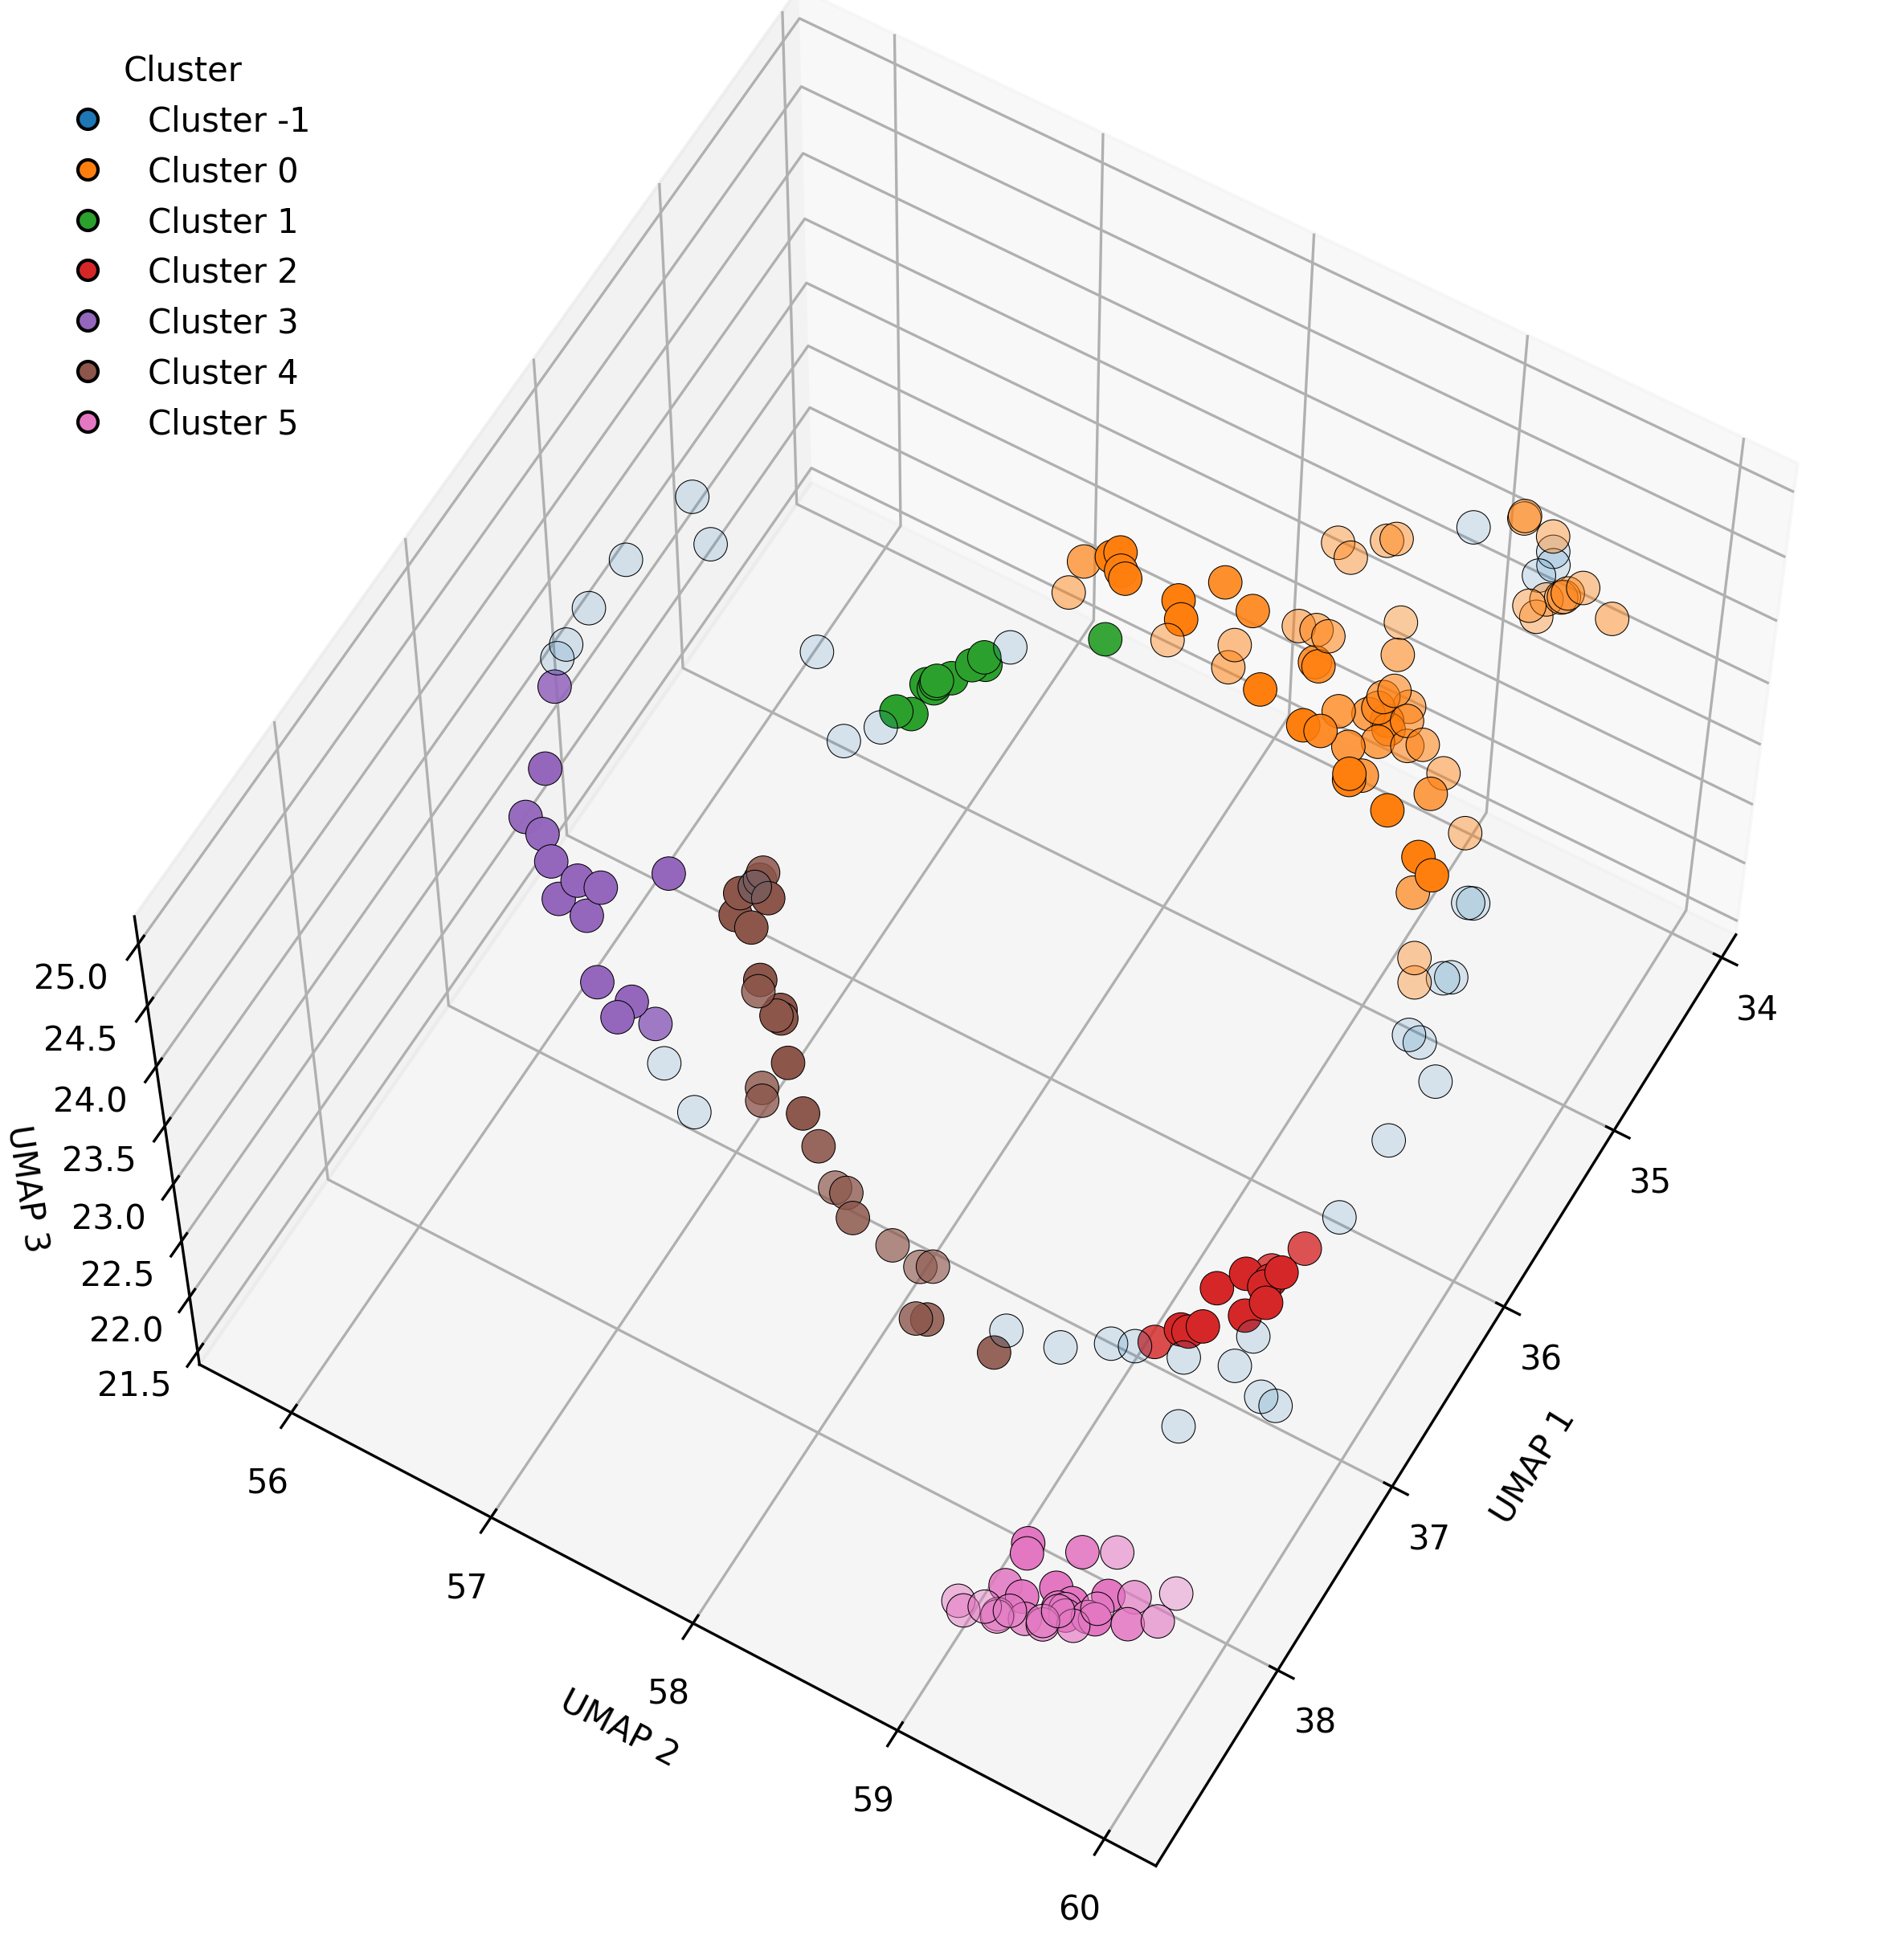

In [5]:
from calvin_utils.ml_utils.brain_umap import BrainUmap
umapper = BrainUmap(data=nimg_df, n_components=3, n_neighbors=50, min_dist=0.05, mask=mask, min_cluster_size=10,
                    metric='euclidean', projection='torus', cluster_voxels=False, visualize_failed_clusters=True)
umapper.run(out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/umapsV2')